In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from collections import Counter
import seaborn as sns
from nltk import punkt, wordnet, word_tokenize
from nltk.stem import PorterStemmer,  WordNetLemmatizer 
from textblob import TextBlob
import collections
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import en_core_web_sm
from textstat import flesch_reading_ease

In [3]:
df = pd.read_json(r'C:\Users\User\Cell_Phones_and_Accessories\Cell_Phones_and_Accessories.json', lines=True)

This json file is 2BG and my computer is having a hard time handling the data. Since there are over 3 million reviews. I will neeed randomly remove values for this to become more workable

In [20]:
np.random.seed(10)

remove_n = 3100000
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)


In [25]:
df = df_subset


In [23]:
df.to_csv('Cell_phone_and_accesory_reviews.csv')

In [2]:
df = pd.read_csv(r'Cell_phone_and_accesory_reviews.csv')

In [12]:
df.head()

,Unnamed: 0,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1
1,15,{'$oid': '5a1321d5741a2384e802c554'},A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1,Do NOT GET IT!!,1353888000,"11 26, 2012",Cell_Phones_and_Accessories,0
2,24,{'$oid': '5a1321d5741a2384e802c56b'},ALX0R9TJFYPRK,0110400550,sav milk schenk,"[0, 0]",It cracks easy but its a nice case and i got a...,4,Its not the best.,1371168000,"06 14, 2013",Cell_Phones_and_Accessories,1
3,106,{'$oid': '5a1321d5741a2384e802c5c3'},A3GSWE15RXFGGB,120401308X,hi,"[2, 3]",I've ordered this item about a month ago and s...,2,still have yet to recieve,1361145600,"02 18, 2013",Cell_Phones_and_Accessories,0
4,144,{'$oid': '5a1321d5741a2384e802c5eb'},A1A6IA2UUM5KZV,120401325X,Jamie Sutherland,"[0, 0]",The patterns do vary just like in the picture ...,5,Great!,1385510400,"11 27, 2013",Cell_Phones_and_Accessories,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85845 entries, 0 to 85844
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      85845 non-null  int64 
 1   _id             85845 non-null  object
 2   reviewerID      85845 non-null  object
 3   asin            85845 non-null  object
 4   reviewerName    84855 non-null  object
 5   helpful         85845 non-null  object
 6   reviewText      85845 non-null  object
 7   overall         85845 non-null  int64 
 8   summary         85844 non-null  object
 9   unixReviewTime  85845 non-null  int64 
 10  reviewTime      85845 non-null  object
 11  category        85845 non-null  object
 12  class           85845 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 8.5+ MB


In [14]:
df.describe()

,Unnamed: 0,overall,unixReviewTime,class
count,8.584500e+04,85845.000000,8.584500e+04,85845.000000
mean,1.589041e+06,3.890745,1.364398e+09,0.706017
std,9.193931e+05,1.436575,4.099795e+07,0.455587
min,2.000000e+00,1.000000,9.707040e+08,0.000000
25%,7.927150e+05,3.000000,1.355011e+09,0.000000
50%,1.588378e+06,5.000000,1.374278e+09,1.000000
75%,2.387435e+06,5.000000,1.391299e+09,1.000000
max,3.185825e+06,5.000000,1.406074e+09,1.000000


First we take a look at total characters in the summary and review text

Text(0.5, 1.0, 'Characters in Summary')

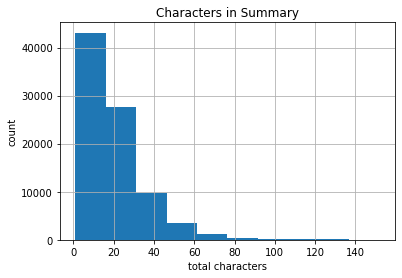

In [15]:
df['summary'].str.len().hist()
plt.xlabel('total characters')
plt.ylabel('count')
plt.title('Characters in Summary')

Text(0.5, 1.0, 'Characters in review')

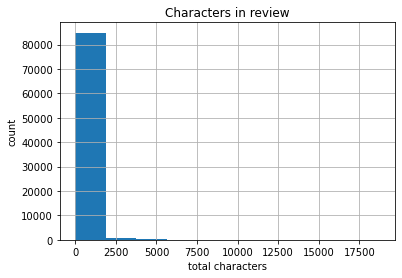

In [16]:
df['reviewText'].str.len().hist()
plt.xlabel('total characters')
plt.ylabel('count')
plt.title('Characters in review')

Next we look at word length in both cases

Text(0.5, 1.0, 'Words in summary')

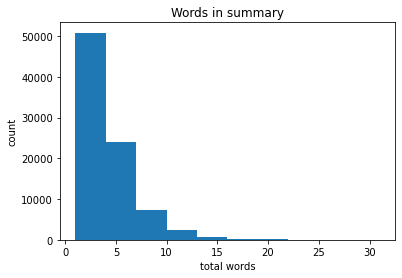

In [83]:
df['summary'] = df['summary'].astype(str)
splitting = df['summary'].str.split()
list_lengths = []
for i in splitting:
    if type(i) == list:
        list_lengths.append(len(i))       
plt.hist(list_lengths)
plt.xlabel('total words')
plt.ylabel('count')
plt.title('Words in summary')

Text(0.5, 1.0, 'Words in review')

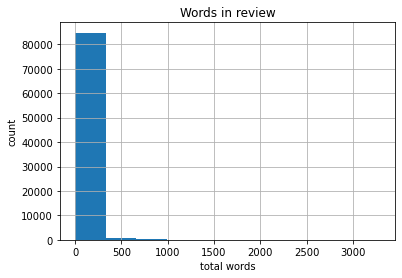

In [84]:
df['reviewText'].str.split().map(lambda x: len(x)).hist()
plt.xlabel('total words')
plt.ylabel('count')
plt.title('Words in review')

Here we will focus on the review texts instead of the summary since there is more information here

In [3]:
corpus=[]
split_df= df['reviewText'].str.split()

new=split_df.values.tolist()

corpus=[word.lower() for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [4]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

Text(0, 0.5, 'word count')

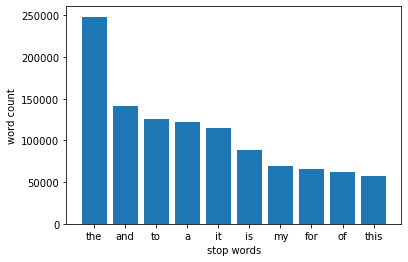

In [87]:
plot_top_stopwords_barchart(df['reviewText'])
plt.xlabel('stop words')
plt.ylabel('word count')

Text(0, 0.5, 'most common words')

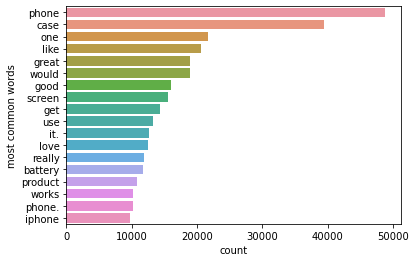

In [161]:
counts=Counter(corpus)
most=counts.most_common()

x, y= [], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common words')

In [89]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def ngram(corpus, n=None):
    vectors = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    combo_words = vectors.transform(corpus)
    sum_words = combo_words.sum(axis=0) 
    words_count = [(word, sum_words[0, idx]) for word, idx in vectors.vocabulary_.items()]
    words_count =sorted(words_count, key = lambda x: x[1], reverse=True)
    return words_count[:10]

ngram(corpus, 2)

[('you re', 1608),
 ('you ll', 647),
 ('they re', 548),
 ('on off', 353),
 ('amazon com', 240),
 ('it ll', 236),
 ('anti glare', 193),
 ('you ve', 184),
 ('it the', 173),
 ('built in', 169)]

First we look at the reviews without the stop words then we take a look at the raw data with stop words

Text(0.5, 1.0, 'summary')

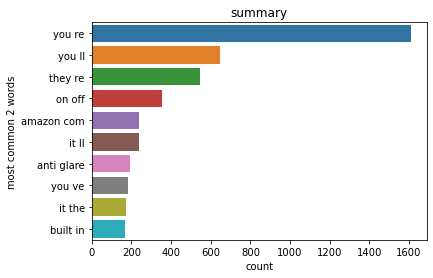

In [163]:
top_n_bigrams=ngram(corpus,2)[:10] 
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common 2 words')
plt.title('summary')

Text(0, 0.5, 'most common 3 words')

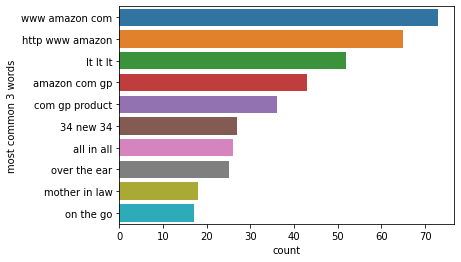

In [164]:
top_n_bigrams=ngram(corpus,3)[:10] 
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common 3 words')
plt.title('summary')

Text(0.5, 1.0, 'review text')

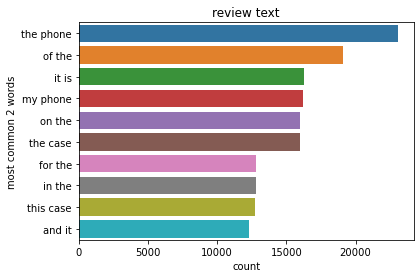

In [165]:
top_n_bigrams=ngram(df['reviewText'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common 2 words')
plt.title('review text')

Text(0.5, 1.0, 'review text')

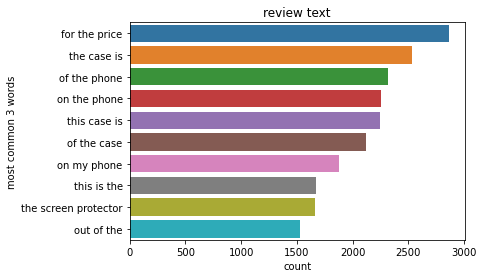

In [166]:
top_n_bigrams=ngram(df['reviewText'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common 3 words')
plt.title('review text')

<AxesSubplot:>

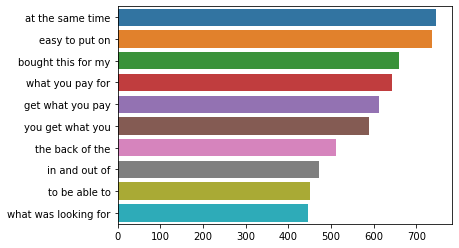

In [43]:
top_n_bigrams=ngram(df['reviewText'],4)[:10] 
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.xlabel('count')
plt.ylabel('most common 4 words')
plt.title('review text')

Next we will take a look at lemmatizing and tokenize our reviews

In [66]:
def preprocess(df): #may be alble to delete this cell
    corpus = []
    stemmer = PorterStemmer() #remove morphing and inflection
    lemmatize = WordNetLemmatizer()# grouping together different inflections of the same word
    for reviews in df['reviewText']:
        words = [word for word in word_tokenize(reviews) if (word not in stop)]
        words = [lemmatize.lemmatize(word) for word in words if len(word)>2]
        
        corpus.append(words)
    return(corpus)
corpus = preprocess(df)

sentiment analysis:


use textbob: comes standard



Text(0.5, 1.0, 'Sentitment review scores')

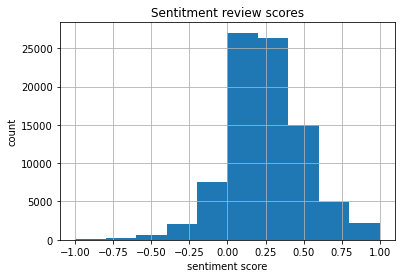

In [167]:
def sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiments_reviews'] = df['reviewText'].apply(lambda x : sentiment(x))
df['sentiments_reviews'].hist()
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Sentitment review scores')

Text(0.5, 1.0, 'Sentitment summary scores')

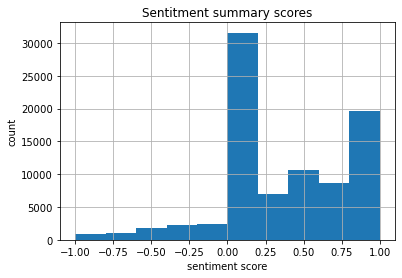

In [168]:
df['sentiment_summary'] = df['summary'].apply(lambda x : sentiment(x))
df['sentiment_summary'].hist()
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Sentitment summary scores')

Text(0.5, 1.0, 'Sentitment review scores')

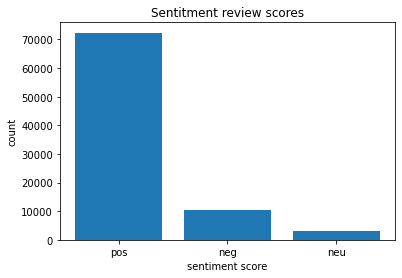

In [169]:
def rating(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['reviews_rating']= df['sentiments_reviews'].map(lambda x: rating(x))

plt.bar(df['reviews_rating'].value_counts().index,
        df['reviews_rating'].value_counts())
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Sentitment review scores')

Text(0.5, 1.0, 'Sentitment summary scores')

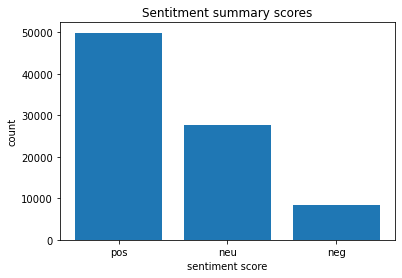

In [170]:
def rating(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['summary_rating']= sentiment_summary.map(lambda x: rating(x))

plt.bar(df['summary_rating'].value_counts().index,
        df['summary_rating'].value_counts())
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Sentitment summary scores')

In [143]:
print(sum(df[df['summary_rating'] == 'pos']['class'].head(25))/25)# quick check on the rating and we can see that most reviews are fake if they are overtly positive
(df[df['summary_rating'] == 'pos'].head())

0.92


,Unnamed: 0,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,sentiments_reviews,sentiment_summary,reviews_rating,summary_rating
0,2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1,0.570000,0.80000,pos,pos
2,24,{'$oid': '5a1321d5741a2384e802c56b'},ALX0R9TJFYPRK,0110400550,sav milk schenk,"[0, 0]",It cracks easy but its a nice case and i got a...,4,Its not the best.,1371168000,"06 14, 2013",Cell_Phones_and_Accessories,1,0.433333,1.00000,pos,pos
4,144,{'$oid': '5a1321d5741a2384e802c5eb'},A1A6IA2UUM5KZV,120401325X,Jamie Sutherland,"[0, 0]",The patterns do vary just like in the picture ...,5,Great!,1385510400,"11 27, 2013",Cell_Phones_and_Accessories,1,0.086667,1.00000,pos,pos
5,170,{'$oid': '5a1321d5741a2384e802c605'},A25CQXG95ZBTCC,120401325X,satisfied customer,"[0, 0]",Not only did my order come in way ahead of tim...,5,absolutely love it!!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0.290625,0.78125,pos,pos
9,255,{'$oid': '5a1321d5741a2384e802c664'},AK55NSPES0MAW,1621911888,"yakov ""s""","[0, 0]",good basic phone. go and see many on line revi...,5,good phone,1368057600,"05 9, 2013",Cell_Phones_and_Accessories,1,0.433333,0.70000,pos,pos


In [144]:
print(sum(df[df['reviews_rating'] == 'pos']['class'].head(25))/25)# quick check on the rating and we can see that most reviews are fake if they are overtly positive
(df[df['reviews_rating'] == 'pos'].head())

0.8


,Unnamed: 0,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,sentiments_reviews,sentiment_summary,reviews_rating,summary_rating
0,2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1,0.570000,0.80000,pos,pos
1,15,{'$oid': '5a1321d5741a2384e802c554'},A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1,Do NOT GET IT!!,1353888000,"11 26, 2012",Cell_Phones_and_Accessories,0,0.090741,0.00000,pos,neu
2,24,{'$oid': '5a1321d5741a2384e802c56b'},ALX0R9TJFYPRK,0110400550,sav milk schenk,"[0, 0]",It cracks easy but its a nice case and i got a...,4,Its not the best.,1371168000,"06 14, 2013",Cell_Phones_and_Accessories,1,0.433333,1.00000,pos,pos
4,144,{'$oid': '5a1321d5741a2384e802c5eb'},A1A6IA2UUM5KZV,120401325X,Jamie Sutherland,"[0, 0]",The patterns do vary just like in the picture ...,5,Great!,1385510400,"11 27, 2013",Cell_Phones_and_Accessories,1,0.086667,1.00000,pos,pos
5,170,{'$oid': '5a1321d5741a2384e802c605'},A25CQXG95ZBTCC,120401325X,satisfied customer,"[0, 0]",Not only did my order come in way ahead of tim...,5,absolutely love it!!,1389830400,"01 16, 2014",Cell_Phones_and_Accessories,1,0.290625,0.78125,pos,pos


vader sentiment: better tool for social media

Text(0.5, 1.0, 'Vader Sentitment review scores')

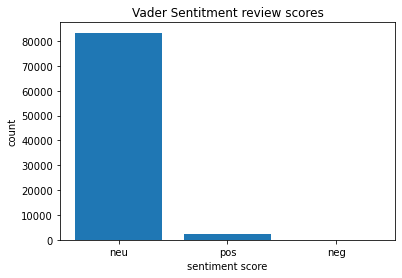

In [172]:
sid = SentimentIntensityAnalyzer()

def _vader_score(sent):
    ss = sid.polarity_scores(sent)# Polarity score returns dictionary
    return np.argmax(list(ss.values())[:-1])

df['vader_score_review'] =df['reviewText'].map(lambda x: get_vader_score(x))
vader_review=df['vader_score_review'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(vader_reviews.value_counts().index,
        vader_review.value_counts())
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Vader Sentitment review scores')

Text(0.5, 1.0, 'Vader Sentitment summary scores')

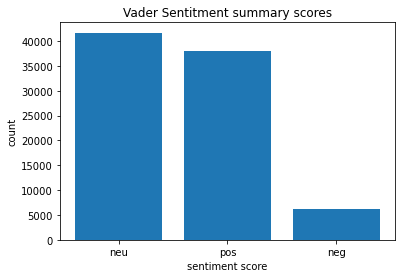

In [173]:
df['vader_score_summary'] =df['summary'].map(lambda x: get_vader_score(x))
vader_summary=df['vader_score_summary'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(vader_summary.value_counts().index,
        vader_summary.value_counts())
plt.xlabel('sentiment score')
plt.ylabel('count')
plt.title('Vader Sentitment summary scores')

name entity recognition:

spaCy


text took too long to load entity detection so we will randomly remove data so that our function will run

In [5]:
nlp = en_core_web_sm.load()

def entity_detect(text):
    document = nlp(text)
    return [label.label_ for label in document.ents]

In [6]:
np.random.seed(10)

remove_n = 80000
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)
entity_summary = df_subset['summary'].apply(lambda x: entity_detect(x))
entity_summary = [x for word in entity_summary for x in word]

In [7]:
count = Counter(entity_summary)
most_common = count.most_common()

Text(0, 0.5, 'entity types')

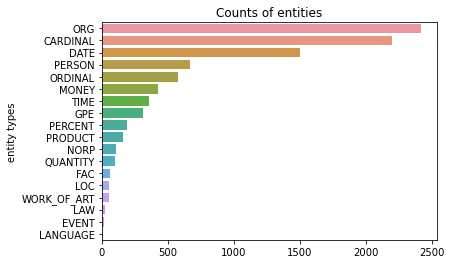

In [31]:
x,y=map(list,zip(*most_common))
sns.barplot(x=y,y=x)
plt.title('Counts of entities')
plt.ylabel('entity types')

Text(0, 0.5, 'Cardinal types')

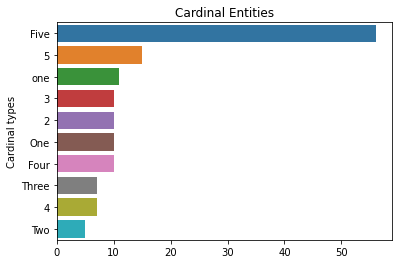

In [30]:
def entity_name(text, ent = 'CARDINAL'):
    document  = nlp(text)
    return [label.text for label in document.ents if label.label_ == ent]

gpe_summary = df_subset['summary'].apply(lambda x: entity_name(x))
gpe_summary = [x for word in gpe_summary for x in word]
gpe_summary_count = Counter(gpe_summary)
x,y = map(list,zip(*gpe_summary_count.most_common(10)))
sns.barplot(x=y , y=x)
plt.title('Cardinal Entities')
plt.ylabel('Cardinal types')

Text(0, 0.5, 'entity types')

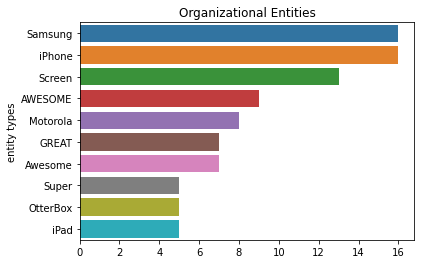

In [29]:
def entity_name_org(text, ent = 'ORG'):
    document  = nlp(text)
    return [label.text for label in document.ents if label.label_ == ent]
gpe_summary = df_subset['summary'].apply(lambda x: entity_name_org(x))
gpe_summary = [x for word in gpe_summary for x in word]
gpe_summary_count = Counter(gpe_summary)
x,y = map(list,zip(*gpe_summary_count.most_common(10)))
sns.barplot(x=y , y=x)
plt.title('Organizational Entities')
plt.ylabel('entity types')

Text(0, 0.5, 'entity types')

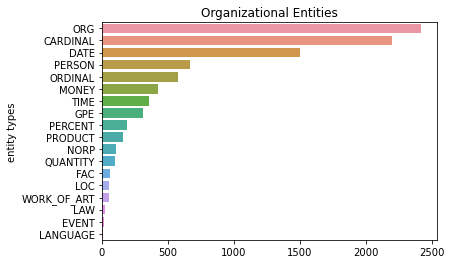

In [26]:
entity_summary = df_subset['reviewText'].apply(lambda x: entity_detect(x))
entity_summary = [x for word in entity_summary for x in word]
count = Counter(entity_summary)
most_common = count.most_common()
x,y=map(list,zip(*most_common))
sns.barplot(x=y,y=x)
plt.title('Organizational Entities')
plt.ylabel('entity types')

Text(0, 0.5, 'entity types')

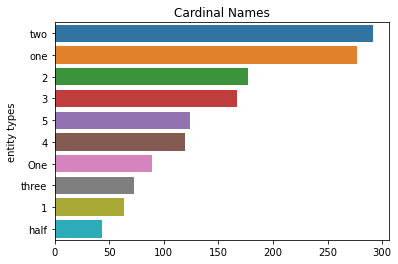

In [27]:
gpe_review = df_subset['reviewText'].apply(lambda x: entity_name(x))
gpe_review = [x for word in gpe_review for x in word]
gpe_count = Counter(gpe_review)
x,y = map(list,zip(*gpe_count.most_common(10)))
sns.barplot(x=y , y=x)
plt.title('Cardinal Names')
plt.ylabel('entity types')

Text(0, 0.5, 'entity types')

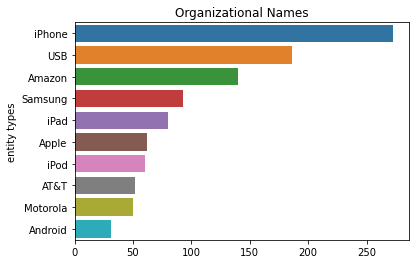

In [28]:
gpe_review = df_subset['reviewText'].apply(lambda x: entity_name_org(x))
gpe_review = [x for word in gpe_review for x in word]
gpe_count = Counter(gpe_review)
x,y = map(list,zip(*gpe_count.most_common(10)))
sns.barplot(x=y , y=x)
plt.title('Organizational Names')
plt.ylabel('entity types')

text complexity with flesch_reading_ease

0-30 college

50-60 high school

60+ fourth grade

Text(0.5, 1.0, 'Flesch review scores')

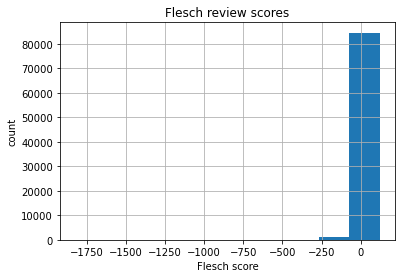

In [176]:
df['reviewText'].apply(lambda x: flesch_reading_ease(x)).hist()
plt.xlabel('Flesch score')
plt.ylabel('count')
plt.title('Flesch review scores')

Text(0.5, 1.0, 'Flesch summary scores')

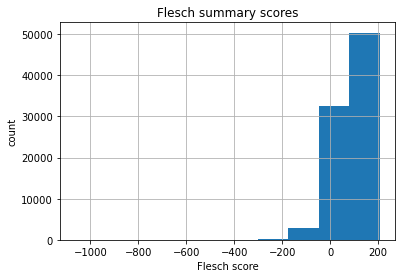

In [178]:
df['summary'].apply(lambda x: flesch_reading_ease(x)).hist()
plt.xlabel('Flesch score')
plt.ylabel('count')
plt.title('Flesch summary scores')